# BIG DATA ANALYSIS : 이상탐지 적용
---


## 신용카드 사기 결제에 대한 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# df = pd.read_csv('credit2.csv')
df = pd.read_csv('credit.csv')

## EDA

In [3]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
1,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
2,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
3,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
4,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85442 entries, 0 to 85441
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    85442 non-null  float64
 1   V1      85442 non-null  float64
 2   V2      85442 non-null  float64
 3   V3      85442 non-null  float64
 4   V4      85442 non-null  float64
 5   V5      85442 non-null  float64
 6   V6      85442 non-null  float64
 7   V7      85442 non-null  float64
 8   V8      85442 non-null  float64
 9   V9      85442 non-null  float64
 10  V10     85442 non-null  float64
 11  V11     85442 non-null  float64
 12  V12     85442 non-null  float64
 13  V13     85442 non-null  float64
 14  V14     85442 non-null  float64
 15  V15     85442 non-null  float64
 16  V16     85442 non-null  float64
 17  V17     85442 non-null  float64
 18  V18     85442 non-null  float64
 19  V19     85442 non-null  float64
 20  V20     85442 non-null  float64
 21  V21     85442 non-null  float64
 22

In [5]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,...,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000,85442.000000
mean,94606.263442,0.003944,-0.000699,0.001165,0.000528,-0.009398,-0.001371,-0.006506,0.001543,0.008015,...,0.001229,0.000833,-0.000803,-0.001834,0.001242,0.001726,0.000597,-0.001459,88.653188,0.001580
std,47511.551811,1.954570,1.649659,1.503579,1.412336,1.370224,1.323985,1.216345,1.177662,1.097720,...,0.729902,0.724724,0.650403,0.602868,0.520276,0.482369,0.398898,0.309939,249.697481,0.039718
min,0.000000,-46.855047,-63.344698,-32.454198,-5.266509,-42.147898,-23.496714,-41.506796,-50.943369,-13.434066,...,-22.665685,-10.933144,-36.666000,-2.836627,-7.025783,-2.534330,-8.878665,-9.617915,0.000000,0.000000
25%,54013.000000,-0.917481,-0.603767,-0.887143,-0.846838,-0.698957,-0.769895,-0.558207,-0.207071,-0.635456,...,-0.227931,-0.542422,-0.162291,-0.354636,-0.316703,-0.326244,-0.070912,-0.052954,5.830000,0.000000
50%,84573.500000,0.026779,0.063766,0.179502,-0.018762,-0.064245,-0.273364,0.034958,0.024180,-0.044666,...,-0.029594,0.007256,-0.011086,0.039440,0.016719,-0.051762,0.001556,0.010937,22.095000,0.000000
75%,139187.750000,1.317737,0.803349,1.025681,0.745032,0.606101,0.398647,0.562449,0.327973,0.604716,...,0.186242,0.529991,0.148336,0.433670,0.351084,0.243768,0.090090,0.076941,78.000000,0.000000
max,172784.000000,2.430507,21.467203,4.069865,16.715537,34.099309,22.529298,36.677268,19.587773,10.370658,...,22.588989,8.361985,22.528412,4.016342,6.070850,3.220178,12.152401,15.374949,19656.530000,1.000000


## Class Imbalance 확인

In [6]:
df['Class'].value_counts()

0    85307
1      135
Name: Class, dtype: int64

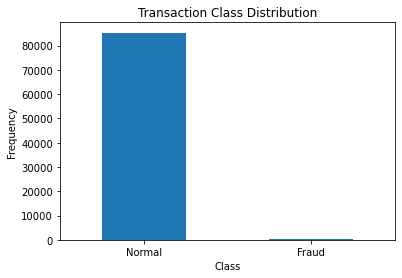

In [7]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

## 사기와 정상 결제의 비교

In [8]:
Fraud = df[df['Class']==1]

Normal = df[df['Class']==0]

In [9]:
Fraud.shape

(135, 31)

In [10]:
Normal.shape

(85307, 31)

In [11]:
Fraud.Amount.describe()

count     135.000000
mean      144.546593
std       322.677448
min         0.000000
25%         1.000000
50%         8.540000
75%       112.425000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
Normal.Amount.describe()

count    85307.000000
mean        88.564735
std        249.557598
min          0.000000
25%          5.880000
50%         22.130000
75%         78.000000
max      19656.530000
Name: Amount, dtype: float64

## 혹시 결제 금액에 따라 구별 할 수 있지 않을까?

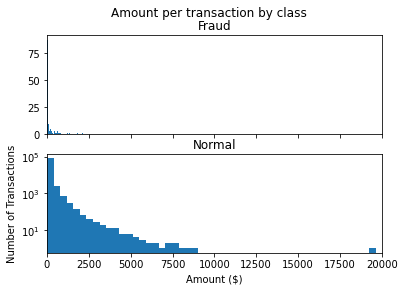

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

## 혹시 결제 시간에 따라 구별 할 수 있지 않을까?

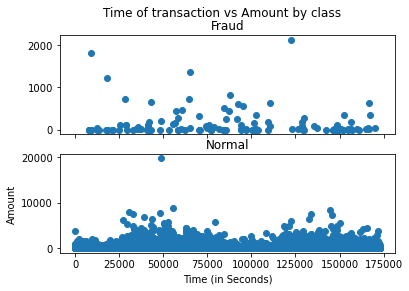

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


## 전체 Feature에 대한 시각화

In [15]:
data1= df.sample(frac = 1,random_state=42)

data1.shape

(85442, 31)

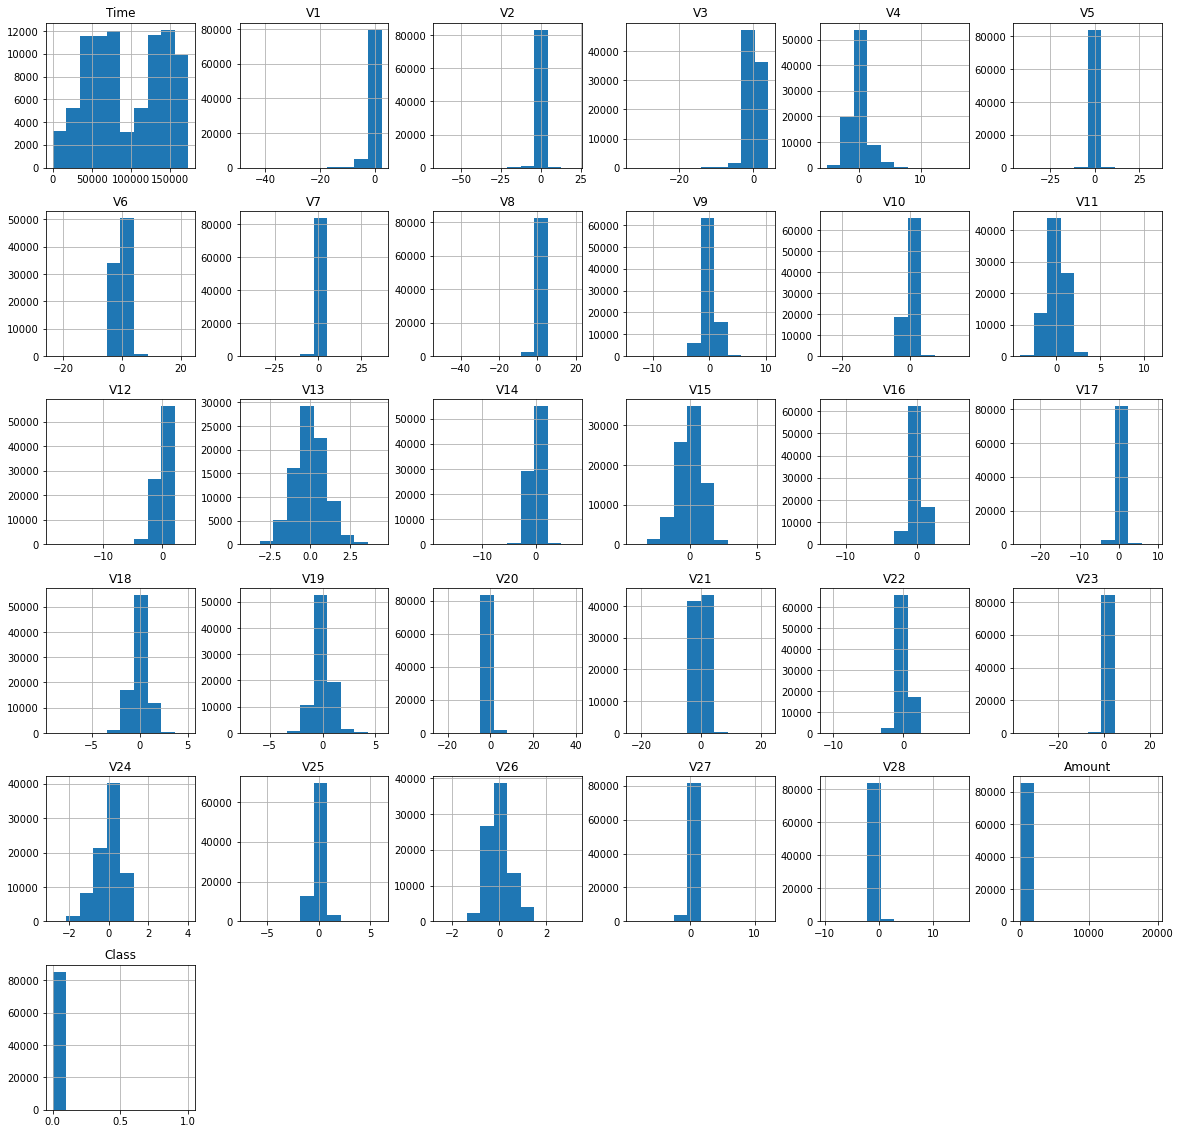

In [16]:
data1.hist(figsize=(20,20))
plt.show()

## 이상치의 비율 확인

In [17]:
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [18]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.001582519605659559
Fraud Cases : 135
Valid Cases : 85307


## 속성간의 상관관계 비교

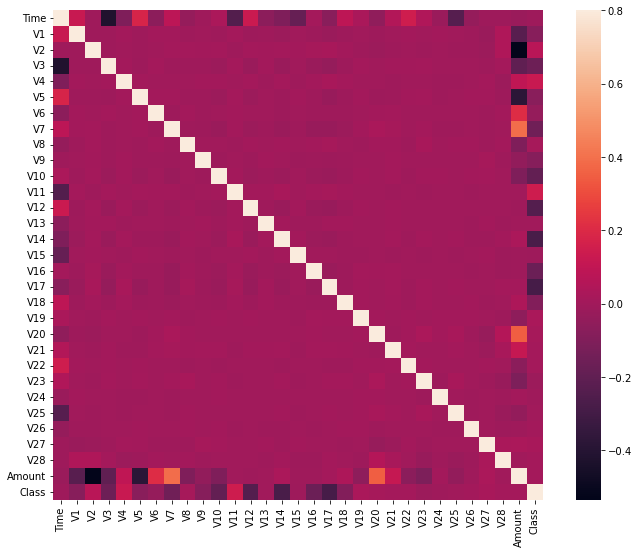

In [19]:
correlation_matrix = data1.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

## 상관관계 절대값 순으로 정렬

In [20]:

correlation_matrix['Class'].abs().sort_values()

V25       0.000163
V13       0.001400
V24       0.004108
V26       0.004310
V28       0.007956
V15       0.008494
Amount    0.008905
Time      0.009264
V22       0.009297
V21       0.012062
V8        0.012771
V20       0.014444
V23       0.015165
V27       0.020911
V19       0.023803
V6        0.037259
V5        0.072362
V2        0.074514
V1        0.081175
V9        0.083798
V18       0.092553
V4        0.124370
V11       0.140900
V7        0.153823
V3        0.162400
V16       0.167519
V10       0.191704
V12       0.241381
V14       0.279430
V17       0.287536
Class     1.000000
Name: Class, dtype: float64

## 속성과 레이블 분리

In [21]:
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# columns = correlation_matrix['Class'].abs().sort_values()[-6:-1].keys()
columns = ["V14","V17","V12"]
print(columns)
# Store the variable we are predicting 
target = "Class"
# Define a random state 
X = data1[columns].values
y = data1[target].values

# Print the shapes of X & Y
print(X.shape)
print(y.shape)

['V14', 'V17', 'V12']
(85442, 3)
(85442,)


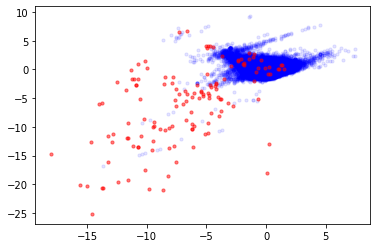

In [22]:
normal = y==0
fraud  = y==1
plt.scatter(X[normal, columns.index("V14")], X[normal, columns.index("V17")], s=10, color='b',alpha=0.1)
plt.scatter(X[fraud, columns.index("V14")], X[fraud, columns.index("V17")], s=10, color='r',alpha=0.5)

In [23]:
# 만약 모두다 정상이라고 했을 때의 Accuracy
(y == 0).sum()/len(y)

0.9984199808056927

## 이상탐지 알고리즘 Import

In [24]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import plot_confusion_matrix


## 데이터셋 분리

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


## 분석 시작

### 1. Logisting Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
    
model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

0.9992099950258946
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34123
           1       0.85      0.61      0.71        54

    accuracy                           1.00     34177
   macro avg       0.92      0.81      0.85     34177
weighted avg       1.00      1.00      1.00     34177

[[34117     6]
 [   21    33]]


### 2. Isolation Forest

In [27]:
train_normal = X_train[y_train==0]
train_outliers = X_train[y_train==1] 
outlier_prop = len(train_outliers) / len(X_train) 
print(outlier_prop)

clf = IsolationForest(contamination=0.0015,random_state=42)
clf.fit(X_train)
y_pred = clf.predict(X_test)

y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

0.0015800253584316785
0.9991807355824093
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34123
           1       0.72      0.78      0.75        54

    accuracy                           1.00     34177
   macro avg       0.86      0.89      0.87     34177
weighted avg       1.00      1.00      1.00     34177

[[34107    16]
 [   12    42]]


### 3. One-Class SVM

In [28]:
from sklearn.svm import OneClassSVM 
   
train_normal = X_train[y_train==0]
train_outliers = X_train[y_train==1] 


svm = OneClassSVM(kernel='rbf',nu=0.00095, gamma=0.002,verbose=True) 
svm.fit(train_normal)

y_pred = svm.predict(X_test) 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

[LibSVM]*
optimization finished, #iter = 56
obj = 847.393554, rho = 37.222023
nSV = 50, nBSV = 48
0.9991807355824093
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34123
           1       0.71      0.81      0.76        54

    accuracy                           1.00     34177
   macro avg       0.85      0.91      0.88     34177
weighted avg       1.00      1.00      1.00     34177

[[34105    18]
 [   10    44]]
